# Döntési fák
A _döntési fák_ módszere egy könnyű és sok esetben mégis hatékony tanuló módszer. Alapvetően osztályozásra és regresszióra is jól alkalmazható módszer, mástnem az adatelemzés elindulásához és egy hatékonyabb módszer választásához.

Nézzük meg a módszer alkalmazhatóságát az Iris adathalmazon, osztályozási feladatra. Először importáljuk be az adathalmazt:

In [1]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)

Használjuk a teljes adathalmazt:

In [2]:
df = iris['data'].join(iris['target'])

Győződjünk meg arról, hogy a teljes adathalmazt használjuk:

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Az adathalmaz oszlopait kiírathatjuk:

In [4]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [5]:
import matplotlib.pyplot as plt

Lássuk, az adathalmazt, például csészelevél szélességének és hosszúságának függvényében. Látható, hogy két külön csoportra oszlik az adathalmaz: 

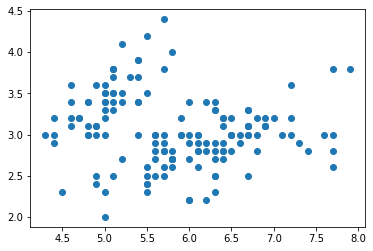

In [6]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'])

A gyakorlás kedvéért plottoljuk ki a csészelevél hosszát. Látható, hogy a legötbb esetben 4.7 és 6.5 közé esnek a többi méret outlier-nek számít.

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <BarContainer object of 10 artists>)

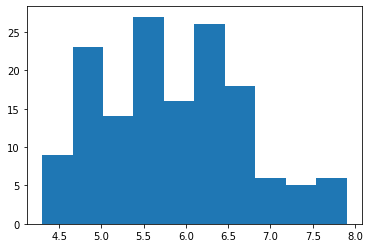

In [7]:
plt.hist(df['sepal length (cm)'])

Lássuk, kimenetként milyen osztályokat várhatunk:

In [26]:
iris_raw = load_iris()
iris_raw.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Tehát esetünkben, az Iris setosa, Iris versicolor és Iris virginica fajták értékei kerültek összegyűjtésre.

## Döntési fa

A döntési fa alapból beépített csomag az __sklearn__ csomagban. Importáljuk be:

In [8]:
from sklearn import tree

Definiáljuk az X és y halmazokat:

In [9]:
X, y = iris.data, iris.target

Definiáljuk az osztályozót:

In [10]:
clf = tree.DecisionTreeClassifier()

Az __sklearn__ algoritmusait általában a _fit_ paranccsal lehet közelíteni. Ugyanez a helyzet a döntési fa esetében is:

In [11]:
clf.fit(X,y)

DecisionTreeClassifier()

Az adathalmazra illesztett döntési fa döntési láncolatát ki lehet jelezni. Látható, hogy a döntési fa milyen értékek esetében hoz létre újabb elágazásokat, ami alapján a döntést hozza meg és osztályokhoz rendeli a bemeneti adatot. A döntési fát a következőképpen lehet kijelezni:

[Text(312.48, 782.784, 'petal length (cm) <= 2.35\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]\nclass = virginica'),
 Text(234.36, 608.832, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]\nclass = setosa'),
 Text(390.6, 608.832, 'petal length (cm) <= 4.95\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]\nclass = virginica'),
 Text(156.24, 434.88, 'petal width (cm) <= 1.65\ngini = 0.153\nsamples = 36\nvalue = [0, 33, 3]\nclass = versicolor'),
 Text(78.12, 260.928, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]\nclass = versicolor'),
 Text(234.36, 260.928, 'sepal width (cm) <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(156.24, 86.976, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = virginica'),
 Text(312.48, 86.976, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(624.96, 434.88, 'petal width (cm) <= 1.75\ngini = 0.05\nsamples = 39\nvalue = [0, 1, 38]\nclass = virginica'),
 Text(546.84, 260.928, 'petal width (cm) <= 1.65\

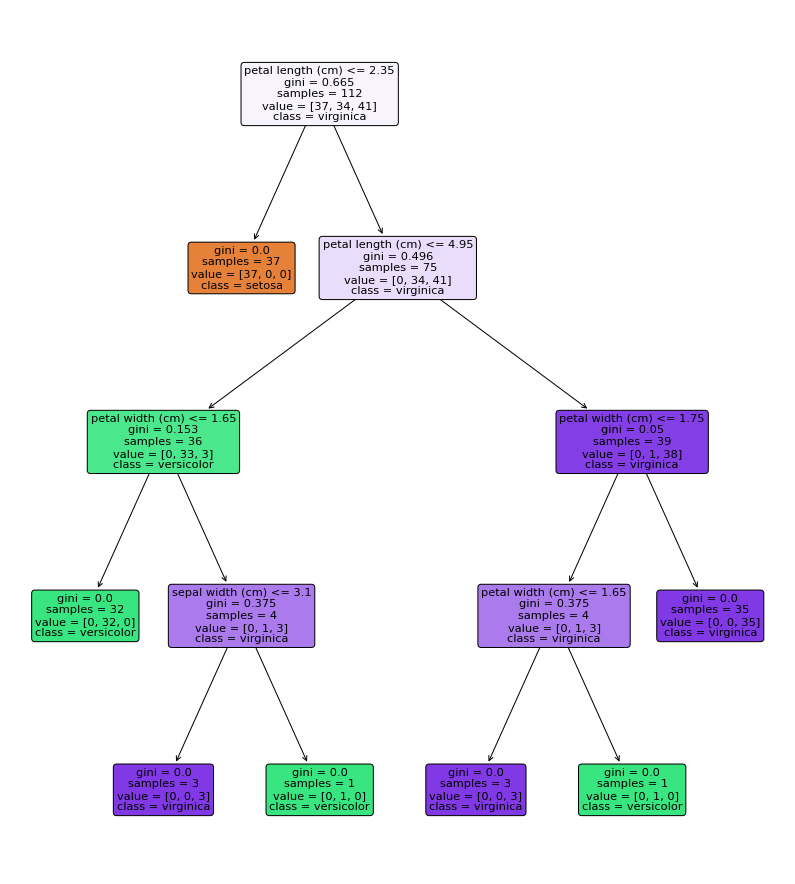

In [30]:
plt.figure(figsize=(14,16))
tree.plot_tree(clf, filled=True, feature_names=iris_raw.feature_names, class_names=iris_raw.target_names, rounded=True)

Az előzőekben egyetlen hibát követtünk el: az adathalmazt nem osztottuk fel tanító és tesztelési adathalmazra. Szerencsére, az _sklearn_ kínál függvényt, amivel a felosztás végrehajtható. Kövessük a 80-20 szabályt az adathalmaz felosztásában.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(iris.data[iris.feature_names], iris.target, random_state=0)

Illesszük az adathalmazt a teszt adathalmazra:

In [14]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

A tesztadathalmaz alapján értékeljük ki az osztályozó teljesítményét. Ez alapján a teszthalmaz által adott osztályok eltérését fogja számolni. Látható, hogy ez alapján elég jó eredményt ad az osztályozó:

In [15]:
score = clf.score(X_test, Y_test)
print(score)

0.9736842105263158


Lássuk, hogy az egyes sorokra milyen eredményt ad vissza az osztályozó! Például az első adatsorra a következő eredménnyel tér vissza:

In [22]:
clf.predict(X_test.iloc[:1])

array([2])

Ez alapján az első sor a 2. osztályba, azaz az Iris Virginica csoportba osztaná.